## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

# Importing Data


In [1]:
import pandas as pd
df_episodes = pd.read_csv('datasets/office_episodes.csv')

print(df_episodes.head())
#print(df_episodes.tail())

N_episodes = len(df_episodes) #number of episodes

   episode_number  season  ... has_guests scaled_ratings
0               0       1  ...      False        0.28125
1               1       1  ...      False        0.53125
2               2       1  ...      False        0.37500
3               3       1  ...      False        0.46875
4               4       1  ...      False        0.56250

[5 rows x 14 columns]


Note: It seems that this file only includes the first 187 of the 201 episodes.

# Pre-visualization
* The episode number is a time-stamp: there seems to be a clear evolution.
* Ratings are suddenly high between episode 125 and episode 150.
* Are ther spikes correlated to the presence of guests in the episode ?

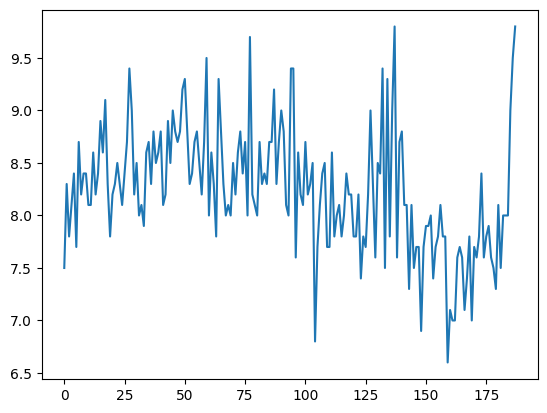

In [2]:
import matplotlib.pyplot as plt

plt.plot(df_episodes["episode_number"], df_episodes["ratings"])
plt.show()

# Creating a color and size mapping
We will define a color scale to differetiate 4 levels of ratings from the lowest to the highest rate received.

In [3]:
colors = []
sizes = [25]*N_episodes
#markers = []

for lab, row in df_episodes.iterrows():
    # color system:
    if row["scaled_ratings"] < 0.25:
        colors.append('red')
    
    elif (row["scaled_ratings"] >= 0.25) and (row["scaled_ratings"] < 0.50):
        colors.append('orange')
    
    elif (row["scaled_ratings"] >= 0.50) and (row["scaled_ratings"] < 0.75):
        colors.append('lightgreen')

    elif row["scaled_ratings"] >= 0.75:
        colors.append('darkgreen')


    # size system:
    if row["has_guests"]:
        sizes[lab] = sizes[lab]*10
        #markers.append('*')
    #else:
        #markers.append('.')
    
    

# Grouping Data by "has_guest"
In scatter plot market accepts a single value, so the method emplyed for creating a color and size system don't work. Data with guests will be plotted at once with one marker and data without guests with another marker.

In [4]:
import numpy as np

# Episodes with guests. Adjust color and size mapping accordingly.
episode_with_guests = df_episodes[df_episodes["has_guests"]]
color_wg = [colors[lab] for lab, rows in episode_with_guests.iterrows()]
size_wg = [sizes[lab] for lab, rows in episode_with_guests.iterrows()]

# Episodes without guests. Adjust color and size mapping accordingly.
episode_no_guests = df_episodes[np.logical_not(df_episodes["has_guests"])]
color_ng = [colors[lab] for lab, rows in episode_no_guests.iterrows()]
size_ng = [sizes[lab] for lab, rows in episode_no_guests.iterrows()]

# automatic testing of consistency
assert episode_with_guests.shape[0] == len(color_wg),'Episode_with_guests & color_wg should have the same entries number'
assert len(episode_with_guests)+len(episode_no_guests) == len(df_episodes),'All episodes should be classified'

#print(episode_no_guests.head())
#print(episode_with_guests.shape)

# Identitying 1st episode of each season
For creating a colored background areas associated to each season.

In [5]:
s=1
SxE0 = []
for lab, row in df_episodes.iterrows():
    if row["season"] == s:
        SxE0.append(row["episode_number"])
        s = s+1
        
# add last episode
SxE0.append(N_episodes)

# simple test
assert df_episodes.loc[[SxE0[0]],["season"]].iloc[0,0] != df_episodes.loc[[SxE0[1]],["season"]].iloc[0,0],'Should be of different seasons'  

print(SxE0)
#print(df_episodes.loc[[SxE0[1]],["season"]].iloc[0,0])#,df_episodes.iloc[28])

[0, 6, 28, 51, 65, 91, 117, 141, 165, 188]


# 1 - Scatter plot
** multivariable representation: **
 * The color scheme reflects the scaled ratings (not the regular ratings) of each episode.
    
 * The sizing and marker system, such that episodes with guest appearances have a star marker with larger size than episodes without guests.
 
 * Background shadow indicates different seasons. Season 8 was apparently bad.

0 0 6
2 28 51
4 65 91
6 117 141
8 165 188


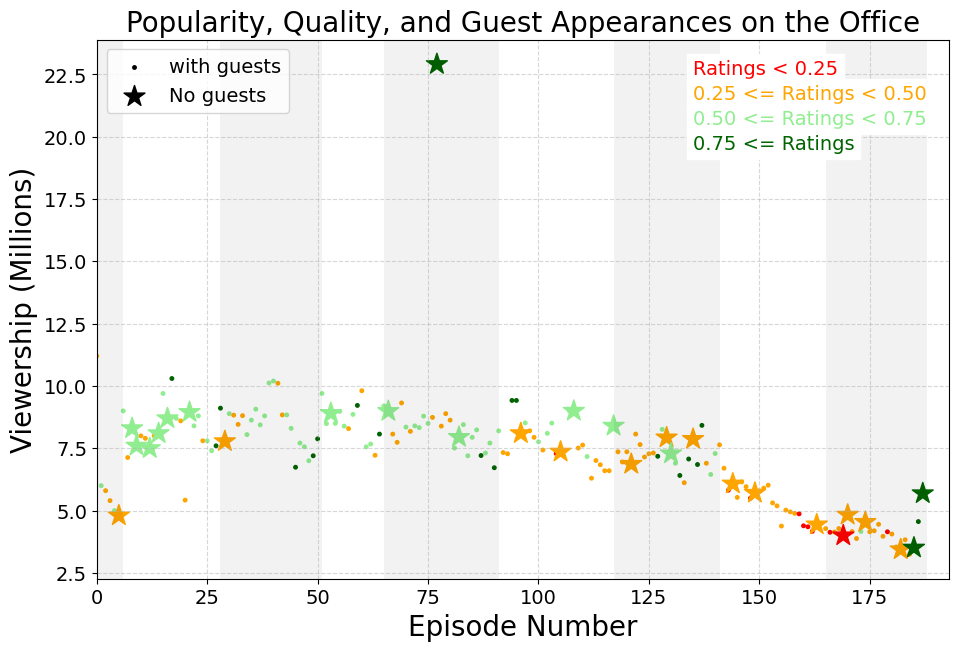

In [6]:
plt.rcParams['figure.figsize'] = [11, 7]
fig = plt.figure()

plt.scatter(episode_no_guests["episode_number"], episode_no_guests["viewership_mil"], c=color_ng, s=size_ng, marker='.')
plt.scatter(episode_with_guests["episode_number"], episode_with_guests["viewership_mil"], c=color_wg, s=size_wg, marker='*')

# #plt.yscale('log')

x_corner, y_croner = 135, 22.5
plt.text(x_corner, y_croner,'Ratings < 0.25',c='r',fontsize=14,backgroundcolor='white')
plt.text(x_corner, y_croner-1,'0.25 <= Ratings < 0.50',c='orange',fontsize=14,backgroundcolor='white')
plt.text(x_corner, y_croner-2,'0.50 <= Ratings < 0.75',c='lightgreen',fontsize=14,backgroundcolor='white')
plt.text(x_corner, y_croner-3,'0.75 <= Ratings',c='darkgreen',fontsize=14,backgroundcolor='white')
leg = plt.legend(['with guests','No guests'],loc=2,fontsize=14)
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')

plt.title("Popularity, Quality, and Guest Appearances on the Office",size=20)
plt.xlabel("Episode Number",size=20)
plt.ylabel("Viewership (Millions)",size=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,N_episodes+5])
plt.grid(ls='--',alpha=0.5)

# background seasonal shadowing
for i in range(len(SxE0)):
    if i%2 == 0:
        print(i,SxE0[i],SxE0[min(i+1,len(SxE0)-1)])
        plt.axvspan(SxE0[i],SxE0[min(i+1,len(SxE0)-1)], facecolor='k', alpha=0.05)

plt.show()

# 2 - Top guest star
**top_star** gets the name of one of the guest stars who was in the most watched Office episode.

In [7]:
top_viewed_episode = episode_with_guests["viewership_mil"].idxmax()

guest_stars = episode_with_guests[ episode_with_guests["episode_number"] == top_viewed_episode ]["guest_stars"].iloc[0]
print("episode " +str(top_viewed_episode)+" guest stars: "+guest_stars, type(guest_stars))

list_guest_stars = guest_stars.split(',')

top_star = list_guest_stars[0]
#print(top_star,type(top_star))

episode 77 guest stars: Cloris Leachman, Jack Black, Jessica Alba <class 'str'>
